In [11]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 8.9 MB/s eta 0:00:00


In [13]:
!pip install -U sentence-transformers datasets torch


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 766.7/766.7 MB 835.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 40.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 37.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 33.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.1/150.1 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 68.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [44]:
pip install torch==2.5.1 torchvision==0.20.1 torchaudio==2.5.1

In [8]:
from datasets import Dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sentence_transformers import SentenceTransformer, losses, InputExample, util
from torch.utils.data import DataLoader
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_extraction.text import TfidfVectorizer
import torch
from transformers import AutoModel, AutoTokenizer

In [ ]:
data = pd.read_csv("/content/Resume-JD (1)(in).csv")
data.head()

,career_objective,skills,degree_names,major_field_of_studies,start_dates,end_dates,positions,job_position_name,educationaL_requirements,experiencere_requirement,responsibilities,skills_required,matched_score,Unnamed: 13,Unnamed: 14
0,bigdataanalyticsworkinganddatabasewarehouseman...,"Big Data , Hadoop , Hive , Python , Mapred...",B.Tech,Electronics,November-19,December-23,Big Data Analyst,Senior Software Engineer,B.Sc in Computer Science & Engineering from a ...,At least 1 year,Technical Support\nTroubleshooting\nCollaborat...,Not Provided,0.850000,NaN,NaN
1,fresherlookingtojoinasadataanalystandjuniordat...,"Data Analysis , Data Analytics , Business An...","B.Sc (Maths) , M.Sc (Science) (Statistics)","Mathematics , Statistics",September-19,December-23,Business Analyst,Machine Learning (ML) Engineer,M.Sc in Computer Science & Engineering or in a...,At least 5 year(s),Machine Learning Leadership\nCross-Functional ...,Not Provided,0.750000,NaN,NaN
2,notprovided,"Software Development , Machine Learning , De...",B.Tech,Electronics/Telecommunication,June-18,December-23,Software Developer (Machine Learning Engineer),"Executive/ Senior Executive- Trade Marketing, ...",Master of Business Administration (MBA),At least 3 years,"Trade Marketing Executive\nBrand Visibility , ...",Brand Promotion\nCampaign Management\nField Su...,0.416667,NaN,NaN
3,toobtainapositioninafastpacedbusinessofficeenv...,"accounts payables , accounts receivables , A...",Computer Applications Specialist Certificate P...,Computer Applications,January-01,November-15,"Accountant , Accounts Receivable Clerk , Mor...",Business Development Executive,Bachelor/Honors,1 to 3 years,Apparel Sourcing\nQuality Garment Sourcing\nRe...,Fast typing skill\nIELTSInternet browsing & on...,0.760000,NaN,NaN
4,professionalaccountantwithanoutstandingworketh...,"Analytical reasoning , Compliance testing kno...",Bachelor of Business Administration,Accounting,January-06,December-23,"Staff Accountant , Senior Accountant , Tax A...",Senior iOS Engineer,Bachelor of Science (BSc) in Computer Science,At least 4 years,iOS Lifecycle\nRequirement Analysis\nNative Fr...,iOS\niOS App Developer\niOS Application Develo...,0.650000,NaN,NaN


In [11]:
resume_columns = ['career_objective', 'skills', 'degree_names', 'major_field_of_studies', 'start_dates', 'end_dates', 'positions']
job_columns = ['job_position_name', 'educationaL_requirements', 'experiencere_requirement', 'responsibilities', 'skills_required']


data['resume_text'] = data[resume_columns].astype(str).agg(' '.join, axis=1)
data['job_description'] = data[job_columns].astype(str).agg(' '.join, axis=1)

match_score_column = 'matched_score'

# **Pretrained SBERT Model**

In [ ]:

sbert_model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

def encode_text(text):
    return sbert_model.encode(str(text), convert_to_tensor=True)

data['resume_embedding'] = data['resume_text'].apply(encode_text)
data['job_embedding'] = data['job_description'].apply(encode_text)

data['similarity_score'] = data.apply(lambda x: util.pytorch_cos_sim(x['resume_embedding'], x['job_embedding']).item(), axis=1)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.51k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

# **TF-IDF Vectorization**

In [ ]:

tfidf_vectorizer = TfidfVectorizer()
resume_tfidf = tfidf_vectorizer.fit_transform(data['resume_text'])
job_tfidf = tfidf_vectorizer.transform(data['job_description'])

data['tfidf_similarity'] = [np.dot(a.toarray(), b.toarray().T).flatten()[0] for a, b in zip(resume_tfidf, job_tfidf)]


In [ ]:
!pip install wandb
import wandb

wandb.login()


wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: paastha210 (paastha210-msu) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

# **Fine-tuning SBERT**

In [ ]:

train_examples = [InputExample(texts=[row['resume_text'], row['job_description']], label=row[match_score_column]) for _, row in data.iterrows()]
train_dataloader = DataLoader(train_examples, shuffle=True, batch_size=16)
train_loss = losses.CosineSimilarityLoss(model=sbert_model)

sbert_model.fit(train_objectives=[(train_dataloader, train_loss)], epochs=3, warmup_steps=100)

data['fine_tuned_similarity'] = data.apply(lambda x: util.pytorch_cos_sim(encode_text(x['resume_text']), encode_text(x['job_description'])).item(), axis=1)


Computing widget examples:   0%|          | 0/1 [00:00<?, ?example/s]

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


Step,Training Loss
500,0.019800
1000,0.010100
1500,0.008500


In [ ]:
import os

save_path = "/content/fine_tuned_sbert"

os.makedirs(save_path, exist_ok=True)


sbert_model.save(save_path)

print(f"Model saved at: {save_path}")
from zipfile import ZipFile
import shutil

zip_path = "/content/fine_tuned_sbert.zip"
shutil.make_archive(zip_path.replace(".zip", ""), 'zip', save_path)


from google.colab import files
files.download(zip_path)


Model saved at: /content/fine_tuned_sbert


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**embeddings to numpy arrays**

In [12]:
import torch


X = data[['resume_embedding', 'job_embedding', 'tfidf_similarity', 'fine_tuned_similarity']]
y = data[match_score_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train['resume_embedding'] = X_train['resume_embedding'].apply(lambda x: eval(x.replace('tensor', 'torch.tensor')) if isinstance(x, str) else x)
X_train['job_embedding'] = X_train['job_embedding'].apply(lambda x: eval(x.replace('tensor', 'torch.tensor')) if isinstance(x, str) else x)
X_test['resume_embedding'] = X_test['resume_embedding'].apply(lambda x: eval(x.replace('tensor', 'torch.tensor')) if isinstance(x, str) else x)
X_test['job_embedding'] = X_test['job_embedding'].apply(lambda x: eval(x.replace('tensor', 'torch.tensor')) if isinstance(x, str) else x)

X_train_np = np.array([torch.cat((a, b)).cpu().numpy() for a, b in zip(X_train['resume_embedding'], X_train['job_embedding'])])
X_test_np = np.array([torch.cat((a, b)).cpu().numpy() for a, b in zip(X_test['resume_embedding'], X_test['job_embedding'])])

data.head()
dataset_path = "/content/updated1_dataset.csv"

data.to_csv(dataset_path, index=False)

print(f"Dataset saved at: {dataset_path}")

Dataset saved at: /content/updated1_dataset.csv


In [ ]:
data.head()

,career_objective,skills,degree_names,major_field_of_studies,start_dates,end_dates,positions,job_position_name,educationaL_requirements,experiencere_requirement,...,matched_score,Unnamed: 13,Unnamed: 14,resume_text,job_description,resume_embedding,job_embedding,similarity_score,tfidf_similarity,fine_tuned_similarity
0,bigdataanalyticsworkinganddatabasewarehouseman...,"Big Data , Hadoop , Hive , Python , Mapred...",B.Tech,Electronics,November-19,December-23,Big Data Analyst,Senior Software Engineer,B.Sc in Computer Science & Engineering from a ...,At least 1 year,...,0.850000,NaN,NaN,bigdataanalyticsworkinganddatabasewarehouseman...,Senior Software Engineer B.Sc in Computer Scie...,"[tensor(-0.1729), tensor(-0.3688), tensor(-0.0...","[tensor(-0.0403), tensor(-0.3474), tensor(-0.2...",0.198401,0.004967,0.785307
1,fresherlookingtojoinasadataanalystandjuniordat...,"Data Analysis , Data Analytics , Business An...","B.Sc (Maths) , M.Sc (Science) (Statistics)","Mathematics , Statistics",September-19,December-23,Business Analyst,Machine Learning (ML) Engineer,M.Sc in Computer Science & Engineering or in a...,At least 5 year(s),...,0.750000,NaN,NaN,fresherlookingtojoinasadataanalystandjuniordat...,Machine Learning (ML) Engineer M.Sc in Compute...,"[tensor(-0.3466), tensor(-0.2207), tensor(-0.4...","[tensor(-0.3029), tensor(-0.3612), tensor(-0.0...",0.406343,0.102397,0.736479
2,notprovided,"Software Development , Machine Learning , De...",B.Tech,Electronics/Telecommunication,June-18,December-23,Software Developer (Machine Learning Engineer),"Executive/ Senior Executive- Trade Marketing, ...",Master of Business Administration (MBA),At least 3 years,...,0.416667,NaN,NaN,"notprovided Software Development , Machine Le...","Executive/ Senior Executive- Trade Marketing, ...","[tensor(0.0098), tensor(-0.3012), tensor(0.163...","[tensor(-0.0814), tensor(-0.0713), tensor(-0.1...",0.164443,0.000000,0.609947
3,toobtainapositioninafastpacedbusinessofficeenv...,"accounts payables , accounts receivables , A...",Computer Applications Specialist Certificate P...,Computer Applications,January-01,November-15,"Accountant , Accounts Receivable Clerk , Mor...",Business Development Executive,Bachelor/Honors,1 to 3 years,...,0.760000,NaN,NaN,toobtainapositioninafastpacedbusinessofficeenv...,Business Development Executive Bachelor/Honors...,"[tensor(-0.2612), tensor(-0.0471), tensor(-0.1...","[tensor(-0.1038), tensor(0.0226), tensor(0.146...",0.174460,0.000000,0.624330
4,professionalaccountantwithanoutstandingworketh...,"Analytical reasoning , Compliance testing kno...",Bachelor of Business Administration,Accounting,January-06,December-23,"Staff Accountant , Senior Accountant , Tax A...",Senior iOS Engineer,Bachelor of Science (BSc) in Computer Science,At least 4 years,...,0.650000,NaN,NaN,professionalaccountantwithanoutstandingworketh...,Senior iOS Engineer Bachelor of Science (BSc) ...,"[tensor(-0.3189), tensor(-0.1161), tensor(-0.1...","[tensor(0.0552), tensor(-0.3451), tensor(0.100...",0.206511,0.010336,0.551849


In [8]:
data=pd.read_csv("updated_dataset.csv")
data.head()


,career_objective,skills,degree_names,major_field_of_studies,start_dates,end_dates,positions,job_position_name,educationaL_requirements,experiencere_requirement,...,matched_score,Unnamed: 13,Unnamed: 14,resume_text,job_description,resume_embedding,job_embedding,similarity_score,tfidf_similarity,fine_tuned_similarity
0,bigdataanalyticsworkinganddatabasewarehouseman...,"Big Data , Hadoop , Hive , Python , Mapred...",B.Tech,Electronics,November-19,December-23,Big Data Analyst,Senior Software Engineer,B.Sc in Computer Science & Engineering from a ...,At least 1 year,...,0.850000,NaN,NaN,bigdataanalyticsworkinganddatabasewarehouseman...,Senior Software Engineer B.Sc in Computer Scie...,"tensor([-1.7294e-01, -3.6880e-01, -1.9550e-02,...","tensor([-0.0403, -0.3474, -0.2828, -0.3986, 0...",0.198401,0.004967,0.785307
1,fresherlookingtojoinasadataanalystandjuniordat...,"Data Analysis , Data Analytics , Business An...","B.Sc (Maths) , M.Sc (Science) (Statistics)","Mathematics , Statistics",September-19,December-23,Business Analyst,Machine Learning (ML) Engineer,M.Sc in Computer Science & Engineering or in a...,At least 5 year(s),...,0.750000,NaN,NaN,fresherlookingtojoinasadataanalystandjuniordat...,Machine Learning (ML) Engineer M.Sc in Compute...,"tensor([-0.3466, -0.2207, -0.4804, 0.0145, 0...","tensor([-3.0289e-01, -3.6121e-01, -6.0847e-02,...",0.406343,0.102397,0.736479
2,notprovided,"Software Development , Machine Learning , De...",B.Tech,Electronics/Telecommunication,June-18,December-23,Software Developer (Machine Learning Engineer),"Executive/ Senior Executive- Trade Marketing, ...",Master of Business Administration (MBA),At least 3 years,...,0.416667,NaN,NaN,"notprovided Software Development , Machine Le...","Executive/ Senior Executive- Trade Marketing, ...","tensor([ 9.8173e-03, -3.0117e-01, 1.6370e-01,...","tensor([-0.0814, -0.0713, -0.1516, -0.3736, 0...",0.164443,0.000000,0.609947
3,toobtainapositioninafastpacedbusinessofficeenv...,"accounts payables , accounts receivables , A...",Computer Applications Specialist Certificate P...,Computer Applications,January-01,November-15,"Accountant , Accounts Receivable Clerk , Mor...",Business Development Executive,Bachelor/Honors,1 to 3 years,...,0.760000,NaN,NaN,toobtainapositioninafastpacedbusinessofficeenv...,Business Development Executive Bachelor/Honors...,"tensor([-2.6119e-01, -4.7119e-02, -1.0721e-01,...","tensor([-1.0379e-01, 2.2603e-02, 1.4686e-01,...",0.174460,0.000000,0.624330
4,professionalaccountantwithanoutstandingworketh...,"Analytical reasoning , Compliance testing kno...",Bachelor of Business Administration,Accounting,January-06,December-23,"Staff Accountant , Senior Accountant , Tax A...",Senior iOS Engineer,Bachelor of Science (BSc) in Computer Science,At least 4 years,...,0.650000,NaN,NaN,professionalaccountantwithanoutstandingworketh...,Senior iOS Engineer Bachelor of Science (BSc) ...,"tensor([-0.3189, -0.1161, -0.1307, -0.1695, 0...","tensor([ 5.5215e-02, -3.4514e-01, 1.0000e-01,...",0.206511,0.010336,0.551849


# **Model Training - Random Forest**

In [13]:

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_np, y_train)
rf_predictions = rf_model.predict(X_test_np)


# **Model Training - SBERT Similarity**

In [14]:

sbert_predictions = data['similarity_score'][X_test.index].values


**Fine-tuned SBERT**

In [15]:

fine_tuned_predictions = data['fine_tuned_similarity'][X_test.index].values


**TF-IDF Similarity**

In [16]:

tfidf_predictions = data['tfidf_similarity'][X_test.index].values


# **RoBERTa & DistilBERT Models**

In [25]:

roberta_model = AutoModel.from_pretrained("roberta-base")
distilbert_model = AutoModel.from_pretrained("distilbert-base-uncased")
tokenizer = AutoTokenizer.from_pretrained("roberta-base")
distilbert_tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [21]:
def get_embedding(text, model, tokenizer):
    inputs = tokenizer(str(text), return_tensors="pt", padding=True, truncation=True)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()


In [27]:
data['resume_roberta'] = data['resume_text'].apply(lambda x: get_embedding(x, roberta_model, tokenizer))
data['job_roberta'] = data['job_description'].apply(lambda x: get_embedding(x, roberta_model, tokenizer))


In [23]:
data.head()

,career_objective,skills,degree_names,major_field_of_studies,start_dates,end_dates,positions,job_position_name,educationaL_requirements,experiencere_requirement,...,Unnamed: 14,resume_text,job_description,resume_embedding,job_embedding,similarity_score,tfidf_similarity,fine_tuned_similarity,resume_roberta,job_roberta
0,bigdataanalyticsworkinganddatabasewarehouseman...,"Big Data , Hadoop , Hive , Python , Mapred...",B.Tech,Electronics,November-19,December-23,Big Data Analyst,Senior Software Engineer,B.Sc in Computer Science & Engineering from a ...,At least 1 year,...,NaN,bigdataanalyticsworkinganddatabasewarehouseman...,Senior Software Engineer B.Sc in Computer Scie...,"tensor([-1.7294e-01, -3.6880e-01, -1.9550e-02,...","tensor([-0.0403, -0.3474, -0.2828, -0.3986, 0...",0.198401,0.004967,0.785307,"[0.044017594, -0.09446608, -0.027319426, 0.145...","[0.04404984, 0.06909152, 0.02827423, 0.1458754..."
1,fresherlookingtojoinasadataanalystandjuniordat...,"Data Analysis , Data Analytics , Business An...","B.Sc (Maths) , M.Sc (Science) (Statistics)","Mathematics , Statistics",September-19,December-23,Business Analyst,Machine Learning (ML) Engineer,M.Sc in Computer Science & Engineering or in a...,At least 5 year(s),...,NaN,fresherlookingtojoinasadataanalystandjuniordat...,Machine Learning (ML) Engineer M.Sc in Compute...,"tensor([-0.3466, -0.2207, -0.4804, 0.0145, 0...","tensor([-3.0289e-01, -3.6121e-01, -6.0847e-02,...",0.406343,0.102397,0.736479,"[0.035905957, -0.06538998, 0.0050654933, 0.221...","[0.05218497, -0.03605132, -0.059242904, 0.1420..."
2,notprovided,"Software Development , Machine Learning , De...",B.Tech,Electronics/Telecommunication,June-18,December-23,Software Developer (Machine Learning Engineer),"Executive/ Senior Executive- Trade Marketing, ...",Master of Business Administration (MBA),At least 3 years,...,NaN,"notprovided Software Development , Machine Le...","Executive/ Senior Executive- Trade Marketing, ...","tensor([ 9.8173e-03, -3.0117e-01, 1.6370e-01,...","tensor([-0.0814, -0.0713, -0.1516, -0.3736, 0...",0.164443,0.000000,0.609947,"[0.058031756, -0.07035669, -0.02221652, 0.1825...","[-0.03933937, 0.034536283, 0.017659506, 0.1348..."
3,toobtainapositioninafastpacedbusinessofficeenv...,"accounts payables , accounts receivables , A...",Computer Applications Specialist Certificate P...,Computer Applications,January-01,November-15,"Accountant , Accounts Receivable Clerk , Mor...",Business Development Executive,Bachelor/Honors,1 to 3 years,...,NaN,toobtainapositioninafastpacedbusinessofficeenv...,Business Development Executive Bachelor/Honors...,"tensor([-2.6119e-01, -4.7119e-02, -1.0721e-01,...","tensor([-1.0379e-01, 2.2603e-02, 1.4686e-01,...",0.174460,0.000000,0.624330,"[0.03431719, -0.06879951, 0.06933196, 0.194359...","[-0.020226669, 0.093745075, 0.07672324, 0.0764..."
4,professionalaccountantwithanoutstandingworketh...,"Analytical reasoning , Compliance testing kno...",Bachelor of Business Administration,Accounting,January-06,December-23,"Staff Accountant , Senior Accountant , Tax A...",Senior iOS Engineer,Bachelor of Science (BSc) in Computer Science,At least 4 years,...,NaN,professionalaccountantwithanoutstandingworketh...,Senior iOS Engineer Bachelor of Science (BSc) ...,"tensor([-0.3189, -0.1161, -0.1307, -0.1695, 0...","tensor([ 5.5215e-02, -3.4514e-01, 1.0000e-01,...",0.206511,0.010336,0.551849,"[0.02093326, -0.08198776, 0.0742469, 0.2226093...","[0.05918737, 0.09005874, 0.020348273, 0.090789..."


In [23]:
def get_embedding(text, model, tokenizer):
    inputs = tokenizer(str(text), return_tensors="pt", padding=True, truncation=True)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

In [28]:
data['resume_distilbert'] = data['resume_text'].apply(lambda x: get_embedding(x, distilbert_model, distilbert_tokenizer))
data['job_distilbert'] = data['job_description'].apply(lambda x: get_embedding(x, distilbert_model,distilbert_tokenizer))



In [29]:
X_train['roberta'] = list(X_train.apply(lambda x: np.concatenate((data.loc[x.name, 'resume_roberta'], data.loc[x.name, 'job_roberta'])), axis=1))
X_test['roberta'] = list(X_test.apply(lambda x: np.concatenate((data.loc[x.name, 'resume_roberta'], data.loc[x.name, 'job_roberta'])), axis=1))

X_train['distilbert'] = list(X_train.apply(lambda x: np.concatenate((data.loc[x.name, 'resume_distilbert'], data.loc[x.name, 'job_distilbert'])), axis=1))
X_test['distilbert'] = list(X_test.apply(lambda x: np.concatenate((data.loc[x.name, 'resume_distilbert'], data.loc[x.name, 'job_distilbert'])), axis=1))

In [28]:
data.head()

,career_objective,skills,degree_names,major_field_of_studies,start_dates,end_dates,positions,job_position_name,educationaL_requirements,experiencere_requirement,...,job_description,resume_embedding,job_embedding,similarity_score,tfidf_similarity,fine_tuned_similarity,resume_roberta,job_roberta,resume_distilbert,job_distilbert
0,bigdataanalyticsworkinganddatabasewarehouseman...,"Big Data , Hadoop , Hive , Python , Mapred...",B.Tech,Electronics,November-19,December-23,Big Data Analyst,Senior Software Engineer,B.Sc in Computer Science & Engineering from a ...,At least 1 year,...,Senior Software Engineer B.Sc in Computer Scie...,"tensor([-1.7294e-01, -3.6880e-01, -1.9550e-02,...","tensor([-0.0403, -0.3474, -0.2828, -0.3986, 0...",0.198401,0.004967,0.785307,"[0.044017594, -0.09446608, -0.027319426, 0.145...","[0.04404984, 0.06909152, 0.02827423, 0.1458754...","[-0.18587992, 0.12345824, 0.422391, 0.27263996...","[-0.06697517, 0.2084816, 0.18778872, 0.0710698..."
1,fresherlookingtojoinasadataanalystandjuniordat...,"Data Analysis , Data Analytics , Business An...","B.Sc (Maths) , M.Sc (Science) (Statistics)","Mathematics , Statistics",September-19,December-23,Business Analyst,Machine Learning (ML) Engineer,M.Sc in Computer Science & Engineering or in a...,At least 5 year(s),...,Machine Learning (ML) Engineer M.Sc in Compute...,"tensor([-0.3466, -0.2207, -0.4804, 0.0145, 0...","tensor([-3.0289e-01, -3.6121e-01, -6.0847e-02,...",0.406343,0.102397,0.736479,"[0.035905957, -0.06538998, 0.0050654933, 0.221...","[0.05218497, -0.03605132, -0.059242904, 0.1420...","[-0.0769816, 0.13822366, 0.31720325, 0.1568043...","[-0.10986722, 0.15828413, 0.20414554, 0.001346..."
2,notprovided,"Software Development , Machine Learning , De...",B.Tech,Electronics/Telecommunication,June-18,December-23,Software Developer (Machine Learning Engineer),"Executive/ Senior Executive- Trade Marketing, ...",Master of Business Administration (MBA),At least 3 years,...,"Executive/ Senior Executive- Trade Marketing, ...","tensor([ 9.8173e-03, -3.0117e-01, 1.6370e-01,...","tensor([-0.0814, -0.0713, -0.1516, -0.3736, 0...",0.164443,0.000000,0.609947,"[0.058031756, -0.07035669, -0.02221652, 0.1825...","[-0.03933937, 0.034536283, 0.017659506, 0.1348...","[-0.07599365, 0.2891499, 0.27447945, 0.1264588...","[0.10830342, 0.39697847, 0.24672301, -0.078188..."
3,toobtainapositioninafastpacedbusinessofficeenv...,"accounts payables , accounts receivables , A...",Computer Applications Specialist Certificate P...,Computer Applications,January-01,November-15,"Accountant , Accounts Receivable Clerk , Mor...",Business Development Executive,Bachelor/Honors,1 to 3 years,...,Business Development Executive Bachelor/Honors...,"tensor([-2.6119e-01, -4.7119e-02, -1.0721e-01,...","tensor([-1.0379e-01, 2.2603e-02, 1.4686e-01,...",0.174460,0.000000,0.624330,"[0.03431719, -0.06879951, 0.06933196, 0.194359...","[-0.020226669, 0.093745075, 0.07672324, 0.0764...","[-0.047928594, 0.32212973, 0.56206757, 0.06999...","[-0.08916338, 0.09446877, 0.33757803, 0.053776..."
4,professionalaccountantwithanoutstandingworketh...,"Analytical reasoning , Compliance testing kno...",Bachelor of Business Administration,Accounting,January-06,December-23,"Staff Accountant , Senior Accountant , Tax A...",Senior iOS Engineer,Bachelor of Science (BSc) in Computer Science,At least 4 years,...,Senior iOS Engineer Bachelor of Science (BSc) ...,"tensor([-0.3189, -0.1161, -0.1307, -0.1695, 0...","tensor([ 5.5215e-02, -3.4514e-01, 1.0000e-01,...",0.206511,0.010336,0.551849,"[0.02093326, -0.08198776, 0.0742469, 0.2226093...","[0.05918737, 0.09005874, 0.020348273, 0.090789...","[-0.15859255, 0.42463475, 0.40810016, 0.053695...","[-0.20589933, 0.35420632, 0.22288825, -0.13582..."


In [30]:
X_train_roberta = np.vstack(X_train['roberta'])
X_test_roberta = np.vstack(X_test['roberta'])

X_train_distilbert = np.vstack(X_train['distilbert'])
X_test_distilbert = np.vstack(X_test['distilbert'])

In [31]:
rf_roberta = RandomForestRegressor(n_estimators=100, random_state=42)
rf_roberta.fit(X_train_roberta, y_train)
roberta_predictions = rf_roberta.predict(X_test_roberta)

In [32]:
rf_distilbert = RandomForestRegressor(n_estimators=100, random_state=42)
rf_distilbert.fit(X_train_distilbert, y_train)
distilbert_predictions = rf_distilbert.predict(X_test_distilbert)

In [49]:
data.head()

,career_objective,skills,degree_names,major_field_of_studies,start_dates,end_dates,positions,job_position_name,educationaL_requirements,experiencere_requirement,...,job_description,resume_embedding,job_embedding,similarity_score,tfidf_similarity,fine_tuned_similarity,resume_roberta,job_roberta,resume_distilbert,job_distilbert
0,bigdataanalyticsworkinganddatabasewarehouseman...,"Big Data , Hadoop , Hive , Python , Mapred...",B.Tech,Electronics,November-19,December-23,Big Data Analyst,Senior Software Engineer,B.Sc in Computer Science & Engineering from a ...,At least 1 year,...,Senior Software Engineer B.Sc in Computer Scie...,"tensor([-1.7294e-01, -3.6880e-01, -1.9550e-02,...","tensor([-0.0403, -0.3474, -0.2828, -0.3986, 0...",0.198401,0.004967,0.785307,"[0.044017594, -0.09446608, -0.027319426, 0.145...","[0.04404984, 0.06909152, 0.02827423, 0.1458754...","[-0.18587992, 0.12345824, 0.422391, 0.27263996...","[-0.06697517, 0.2084816, 0.18778872, 0.0710698..."
1,fresherlookingtojoinasadataanalystandjuniordat...,"Data Analysis , Data Analytics , Business An...","B.Sc (Maths) , M.Sc (Science) (Statistics)","Mathematics , Statistics",September-19,December-23,Business Analyst,Machine Learning (ML) Engineer,M.Sc in Computer Science & Engineering or in a...,At least 5 year(s),...,Machine Learning (ML) Engineer M.Sc in Compute...,"tensor([-0.3466, -0.2207, -0.4804, 0.0145, 0...","tensor([-3.0289e-01, -3.6121e-01, -6.0847e-02,...",0.406343,0.102397,0.736479,"[0.035905957, -0.06538998, 0.0050654933, 0.221...","[0.05218497, -0.03605132, -0.059242904, 0.1420...","[-0.0769816, 0.13822366, 0.31720325, 0.1568043...","[-0.10986722, 0.15828413, 0.20414554, 0.001346..."
2,notprovided,"Software Development , Machine Learning , De...",B.Tech,Electronics/Telecommunication,June-18,December-23,Software Developer (Machine Learning Engineer),"Executive/ Senior Executive- Trade Marketing, ...",Master of Business Administration (MBA),At least 3 years,...,"Executive/ Senior Executive- Trade Marketing, ...","tensor([ 9.8173e-03, -3.0117e-01, 1.6370e-01,...","tensor([-0.0814, -0.0713, -0.1516, -0.3736, 0...",0.164443,0.000000,0.609947,"[0.058031756, -0.07035669, -0.02221652, 0.1825...","[-0.03933937, 0.034536283, 0.017659506, 0.1348...","[-0.07599365, 0.2891499, 0.27447945, 0.1264588...","[0.10830342, 0.39697847, 0.24672301, -0.078188..."
3,toobtainapositioninafastpacedbusinessofficeenv...,"accounts payables , accounts receivables , A...",Computer Applications Specialist Certificate P...,Computer Applications,January-01,November-15,"Accountant , Accounts Receivable Clerk , Mor...",Business Development Executive,Bachelor/Honors,1 to 3 years,...,Business Development Executive Bachelor/Honors...,"tensor([-2.6119e-01, -4.7119e-02, -1.0721e-01,...","tensor([-1.0379e-01, 2.2603e-02, 1.4686e-01,...",0.174460,0.000000,0.624330,"[0.03431719, -0.06879951, 0.06933196, 0.194359...","[-0.020226669, 0.093745075, 0.07672324, 0.0764...","[-0.047928594, 0.32212973, 0.56206757, 0.06999...","[-0.08916338, 0.09446877, 0.33757803, 0.053776..."
4,professionalaccountantwithanoutstandingworketh...,"Analytical reasoning , Compliance testing kno...",Bachelor of Business Administration,Accounting,January-06,December-23,"Staff Accountant , Senior Accountant , Tax A...",Senior iOS Engineer,Bachelor of Science (BSc) in Computer Science,At least 4 years,...,Senior iOS Engineer Bachelor of Science (BSc) ...,"tensor([-0.3189, -0.1161, -0.1307, -0.1695, 0...","tensor([ 5.5215e-02, -3.4514e-01, 1.0000e-01,...",0.206511,0.010336,0.551849,"[0.02093326, -0.08198776, 0.0742469, 0.2226093...","[0.05918737, 0.09005874, 0.020348273, 0.090789...","[-0.15859255, 0.42463475, 0.40810016, 0.053695...","[-0.20589933, 0.35420632, 0.22288825, -0.13582..."


In [33]:
print(distilbert_predictions)
print(roberta_predictions)
print(tfidf_predictions)
print(fine_tuned_predictions)
print(sbert_predictions)
print(rf_predictions)

[0.69016667 0.64746653 0.55089999 ... 0.70336667 0.66903333 0.79628333]
[0.68413333 0.67089979 0.44879999 ... 0.65123333 0.7307     0.82751667]
[0.0320354  0.05799932 0.02054751 ... 0.03728509 0.0102286  0.01403037]
[0.65524435 0.66798818 0.46624273 ... 0.63035607 0.65942025 0.80841374]
[0.16838737 0.48664382 0.25416964 ... 0.30274209 0.36194575 0.38582474]
[0.68373333 0.68419984 0.51196667 ... 0.6928     0.63116667 0.81836667]


# **Calculating MSE and R²**

In [34]:
models = {
    'Random Forest': rf_predictions,
    'Pretrained SBERT': sbert_predictions,
    'Fine-tuned SBERT': fine_tuned_predictions,
    'TF-IDF Similarity': tfidf_predictions,
    'RoBERTa': roberta_predictions,
    'DistilBERT': distilbert_predictions
}
results = {}
for name, preds in models.items():
    mse = mean_squared_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    results[name] = {'MSE': mse, 'R2': r2}

df_results = pd.DataFrame(results).T
new_sbert_results = pd.DataFrame({
    'MSE': [0.0109],
    'R2': [0.6207]
}, index=['SBERT (All-MiniLM-L6-v2)'])

# Append new results
df_results = pd.concat([df_results, new_sbert_results])

print(df_results)

                               MSE         R2
Random Forest             0.010476   0.621165
Pretrained SBERT          0.168999  -5.111341
Fine-tuned SBERT          0.006827   0.753123
TF-IDF Similarity         0.411796 -13.891346
RoBERTa                   0.010221   0.630385
DistilBERT                0.009425   0.659160
SBERT (All-MiniLM-L6-v2)  0.010900   0.620700


In [52]:
# Sample Predictions Comparison
sample_indices = np.random.choice(len(X_test), 5, replace=False)
comparison_df = pd.DataFrame({
    'Actual Match Score': y_test.iloc[sample_indices].values,
    **{name: preds[sample_indices] for name, preds in models.items()}
})
print(comparison_df)

   Actual Match Score  Random Forest  Pretrained SBERT  Fine-tuned SBERT  \
0            0.716667       0.779899          0.268811          0.717400   
1            0.826667       0.727099          0.246634          0.680916   
2            0.716667       0.690067          0.409750          0.749828   
3            0.583333       0.501600          0.189677          0.394639   
4            0.333333       0.467100          0.277408          0.355755   

   TF-IDF Similarity   RoBERTa  DistilBERT  
0           0.062869  0.732800    0.787162  
1           0.049812  0.723700    0.736900  
2           0.044340  0.679300    0.713667  
3           0.013362  0.484367    0.501233  
4           0.051411  0.433900    0.468933  


In [54]:
dataset_path = "/content/embedded_dataset.csv"

# Save the dataset as a CSV file
data.to_csv(dataset_path, index=False)

print(f"Dataset saved at: {dataset_path}")

Dataset saved at: /content/embedded_dataset.csv


In [4]:
data=pd.read_csv("embedded_dataset.csv")
data.head()

,career_objective,skills,degree_names,major_field_of_studies,start_dates,end_dates,positions,job_position_name,educationaL_requirements,experiencere_requirement,...,job_description,resume_embedding,job_embedding,similarity_score,tfidf_similarity,fine_tuned_similarity,resume_roberta,job_roberta,resume_distilbert,job_distilbert
0,bigdataanalyticsworkinganddatabasewarehouseman...,"Big Data , Hadoop , Hive , Python , Mapred...",B.Tech,Electronics,November-19,December-23,Big Data Analyst,Senior Software Engineer,B.Sc in Computer Science & Engineering from a ...,At least 1 year,...,Senior Software Engineer B.Sc in Computer Scie...,"tensor([-1.7294e-01, -3.6880e-01, -1.9550e-02,...","tensor([-0.0403, -0.3474, -0.2828, -0.3986, 0...",0.198401,0.004967,0.785307,[ 4.40175943e-02 -9.44660828e-02 -2.73194257e-...,[ 4.40498404e-02 6.90915212e-02 2.82742307e-...,[-1.85879916e-01 1.23458236e-01 4.22390997e-...,[-6.69751689e-02 2.08481595e-01 1.87788725e-...
1,fresherlookingtojoinasadataanalystandjuniordat...,"Data Analysis , Data Analytics , Business An...","B.Sc (Maths) , M.Sc (Science) (Statistics)","Mathematics , Statistics",September-19,December-23,Business Analyst,Machine Learning (ML) Engineer,M.Sc in Computer Science & Engineering or in a...,At least 5 year(s),...,Machine Learning (ML) Engineer M.Sc in Compute...,"tensor([-0.3466, -0.2207, -0.4804, 0.0145, 0...","tensor([-3.0289e-01, -3.6121e-01, -6.0847e-02,...",0.406343,0.102397,0.736479,[ 3.59059572e-02 -6.53899834e-02 5.06549329e-...,[ 5.21849692e-02 -3.60513218e-02 -5.92429042e-...,[-7.69815966e-02 1.38223663e-01 3.17203254e-...,[-1.09867223e-01 1.58284128e-01 2.04145536e-...
2,notprovided,"Software Development , Machine Learning , De...",B.Tech,Electronics/Telecommunication,June-18,December-23,Software Developer (Machine Learning Engineer),"Executive/ Senior Executive- Trade Marketing, ...",Master of Business Administration (MBA),At least 3 years,...,"Executive/ Senior Executive- Trade Marketing, ...","tensor([ 9.8173e-03, -3.0117e-01, 1.6370e-01,...","tensor([-0.0814, -0.0713, -0.1516, -0.3736, 0...",0.164443,0.000000,0.609947,[ 5.80317564e-02 -7.03566894e-02 -2.22165193e-...,[-3.93393710e-02 3.45362835e-02 1.76595058e-...,[-7.59936497e-02 2.89149910e-01 2.74479449e-...,[ 1.08303420e-01 3.96978468e-01 2.46723011e-...
3,toobtainapositioninafastpacedbusinessofficeenv...,"accounts payables , accounts receivables , A...",Computer Applications Specialist Certificate P...,Computer Applications,January-01,November-15,"Accountant , Accounts Receivable Clerk , Mor...",Business Development Executive,Bachelor/Honors,1 to 3 years,...,Business Development Executive Bachelor/Honors...,"tensor([-2.6119e-01, -4.7119e-02, -1.0721e-01,...","tensor([-1.0379e-01, 2.2603e-02, 1.4686e-01,...",0.174460,0.000000,0.624330,[ 3.43171917e-02 -6.87995106e-02 6.93319589e-...,[-2.02266686e-02 9.37450752e-02 7.67232403e-...,[-4.79285941e-02 3.22129726e-01 5.62067568e-...,[-8.91633779e-02 9.44687724e-02 3.37578028e-...
4,professionalaccountantwithanoutstandingworketh...,"Analytical reasoning , Compliance testing kno...",Bachelor of Business Administration,Accounting,January-06,December-23,"Staff Accountant , Senior Accountant , Tax A...",Senior iOS Engineer,Bachelor of Science (BSc) in Computer Science,At least 4 years,...,Senior iOS Engineer Bachelor of Science (BSc) ...,"tensor([-0.3189, -0.1161, -0.1307, -0.1695, 0...","tensor([ 5.5215e-02, -3.4514e-01, 1.0000e-01,...",0.206511,0.010336,0.551849,[ 2.09332593e-02 -8.19877610e-02 7.42468983e-...,[ 5.91873713e-02 9.00587365e-02 2.03482732e-...,[-1.58592552e-01 4.24634755e-01 4.08100158e-...,[-2.05899328e-01 3.54206324e-01 2.22888246e-...


# **Chart Comparision**

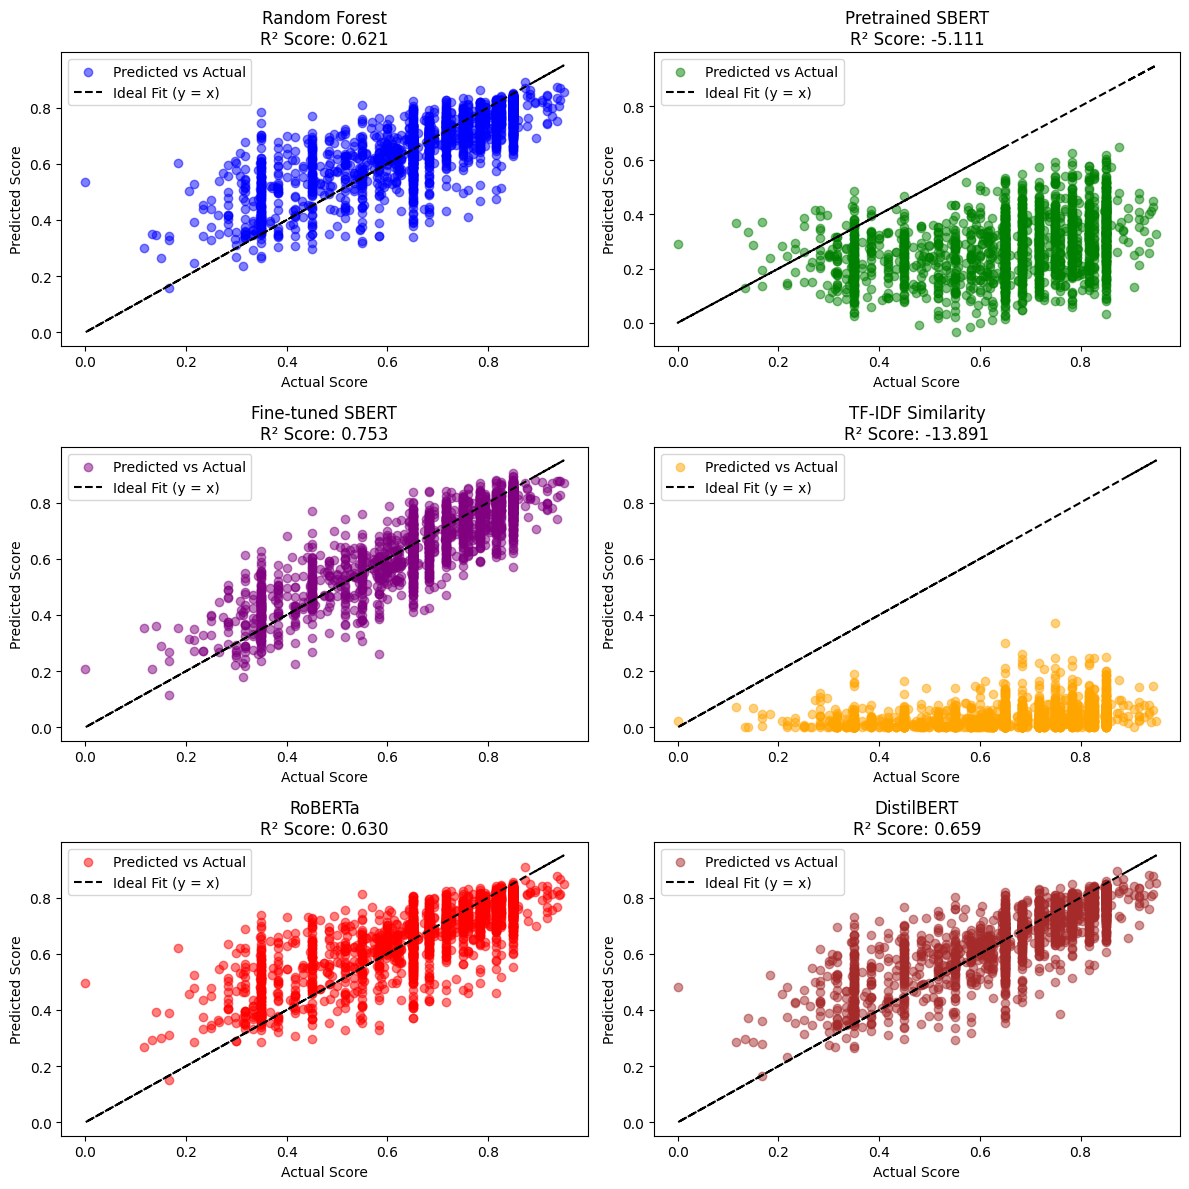

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score

colors = ['blue', 'green', 'purple', 'orange', 'red', 'brown']

fig, axes = plt.subplots(3, 2, figsize=(12, 12))

#Scatter plot for each model
for ax, (name, preds), color in zip(axes.flatten(), models.items(), colors):
    r2 = r2_score(y_test, preds)
    ax.scatter(y_test, preds, alpha=0.5, color=color, label="Predicted vs Actual")
    ax.plot(y_test, y_test, color='black', linestyle='--', label="Ideal Fit (y = x)")
    ax.set_xlabel("Actual Score")
    ax.set_ylabel("Predicted Score")
    ax.set_title(f"{name}\nR² Score: {r2:.3f}")
    ax.legend()

plt.tight_layout()
plt.show()


1. Fine-tuned SBERT performed the best, as most predicted values align closely with the ideal y = x line, showing a high R² score of 0.753 and low error.
2. DistilBERT also performed well, with predictions following the diagonal line fairly closely, reflecting a strong R² score of 0.659.
3. RoBERTa and Random Forest showed moderate performance, with predictions distributed around the ideal fit line but slightly more scattered than Fine-tuned SBERT.
4. Pretrained SBERT exhibited weak predictive power, with significant scatter and deviation from the diagonal, leading to a negative R² score (-5.111).
5. TF-IDF Similarity performed the worst, with highly scattered points and the most negative R² score (-13.891), indicating that it struggles to capture meaningful relationships between resumes and job descriptions.

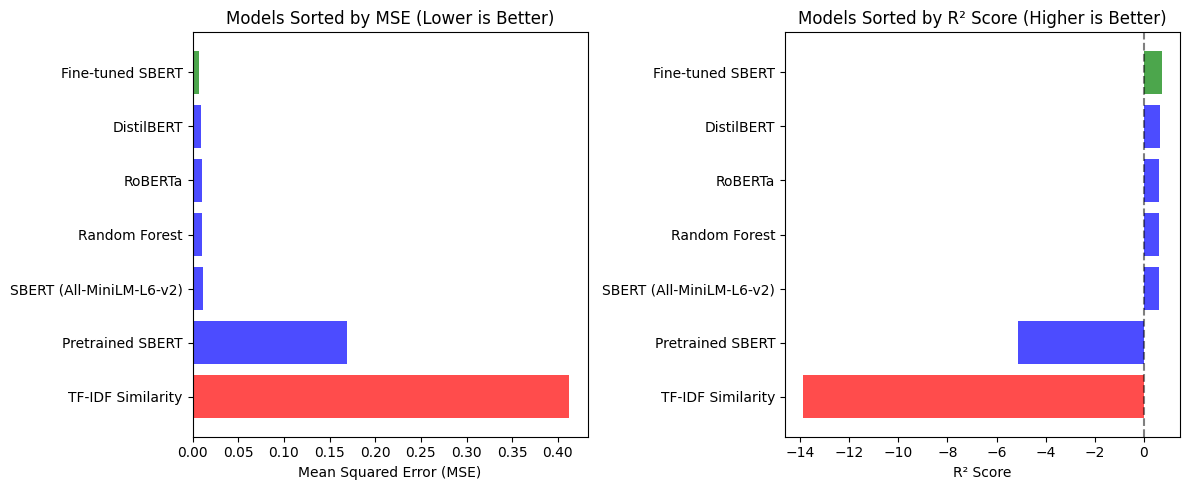

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score



df_mse_sorted = df_results.sort_values(by="MSE")  # Lower MSE is better
df_r2_sorted = df_results.sort_values(by="R2", ascending=False)  # Higher R² is better

# Green for best, Red for worst, Blue for others
colors_mse = ["green" if i == 0 else "red" if i == len(df_mse_sorted)-1 else "blue" for i in range(len(df_mse_sorted))]
colors_r2 = ["green" if i == 0 else "red" if i == len(df_r2_sorted)-1 else "blue" for i in range(len(df_r2_sorted))]

plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
plt.barh(df_mse_sorted.index, df_mse_sorted["MSE"], color=colors_mse, alpha=0.7)
plt.xlabel("Mean Squared Error (MSE)")
plt.title("Models Sorted by MSE (Lower is Better)")
plt.gca().invert_yaxis()


plt.subplot(1, 2, 2)
plt.barh(df_r2_sorted.index, df_r2_sorted["R2"], color=colors_r2, alpha=0.7)
plt.xlabel("R² Score")
plt.title("Models Sorted by R² Score (Higher is Better)")
plt.axvline(x=0, color='black', linestyle='--', alpha=0.5)
plt.gca().invert_yaxis()


plt.tight_layout()
plt.show()

Based on the evaluation of different models for resume and job description matching, the following results were obtained using Mean Squared Error (MSE) and R² Score:

1. Fine-tuned SBERT achieved the best performance, with the lowest MSE of 0.006827 and the highest R² score of 0.753123, indicating a strong predictive ability and accurate matching.
2. DistilBERT performed well, with an MSE of 0.009425 and an R² score of 0.659160, making it a strong contender.
3. RoBERTa and Random Forest had comparable performance, with MSE values of 0.010221 and 0.010476, and R² scores of 0.630385 and 0.621165, respectively.
4. All-MiniLM-L6-v2 performed similarly to Random Forest, with an MSE of 0.0109 and an R² score of 0.6207, indicating moderate predictive performance.
5. Pretrained SBERT showed weaker performance with a significantly higher MSE of 0.168999 and a negative R² score of -5.111341, indicating poor predictive power.
6. TF-IDF Similarity performed the worst, with the highest MSE of 0.411796 and the most negative R² score of -13.891346, suggesting that it fails to capture meaningful relationships between resumes and job descriptions.